In [1]:
import matplotlib.pyplot as plt
import ast
import numpy as np
import time

from matplotlib.pyplot import figure

In [2]:
n = 100

def plot_eigen(lines, last=None, title=None, fig=None, first=None):
    e_range = list(map(lambda x : ast.literal_eval(x)['eigenvalues'][:n], lines))
    if last:
        e_range = e_range[:last]
    if first:
        e_range = e_range[first:]
    
    
        
#     if not fig:
#         figure(figsize=(8, 6), dpi=80)

    x_vals = [25 * i for i in range(len(e_range))]

    for i in range(n):
        plt.plot(x_vals, list(map(lambda x : x[i], e_range)))

        
    plt.xlabel("Step")
    plt.ylabel("$\lambda$")
    
    if title:
        t = f"$\lambda$ vs step -- {title}"
    else:
        t = "$\lambda$ vs step"
    plt.title(t)
#     plt.show()

def mk_plot(check, name=None, last=None, first=None):
    with open(f"./checkpoint_{check}/eigen.txt") as f:
        test_lines = f.readlines()
    plot_eigen(test_lines, last, name, first=first)
    
def plot_scaled_eigen(lines, last=None, title=None, first=None):
    e_range = list(map(lambda x : ast.literal_eval(x)['eigenvalues'][:n], lines))

    if last:
        e_range = e_range[:last]
    if first:
        e_range = e_range[first:]

    figure(figsize=(8, 6), dpi=80)
    
    x_vals = [25 * i for i in range(len(e_range))]

    for i in range(n):
        plt.plot(x_vals, list(map(lambda x : x[i] / x[0], e_range)))


    plt.xlabel("Step")
    plt.ylabel("$\lambda$")

    if title:
        t = f"Scaled $\lambda$ vs step -- {title}"
    else:
        t = "Scaled $\lambda$ vs step"
    plt.title(t)
    plt.show()

def plot_loss(lines, last=None, first=None, fig=None):
    loss = []
    
    for l in lines[1:]:
        try:
            a = ast.literal_eval(l)
            loss.append(a["loss"])
        except:
            print("Failed for line:", l)
        
    if last:
        loss=loss[:last]
    if first:
        loss=loss[first:]

    x_vals = [25 * i for i in range(len(loss))]

    plt.plot(x_vals, loss)


    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Loss vs step")

    plt.show()
    
def plot_eigen_loss(folder, last=None, first=None, fig=None):
    with open(f"checkpoint_{folder}/stats.txt") as f:
        stats = f.readlines()
    with open(f"checkpoint_{folder}/eigen.txt") as f:
        eigen = f.readlines()

    if not fig:
        fig = plt.figure(figsize=(8, 6))

    plt.subplot(2, 1, 1)
    plot_eigen(eigen, last=last, fig=fig, first=first)

    plt.subplot(2, 1, 2)
    plot_loss(stats, last=last, fig=fig, first=first)

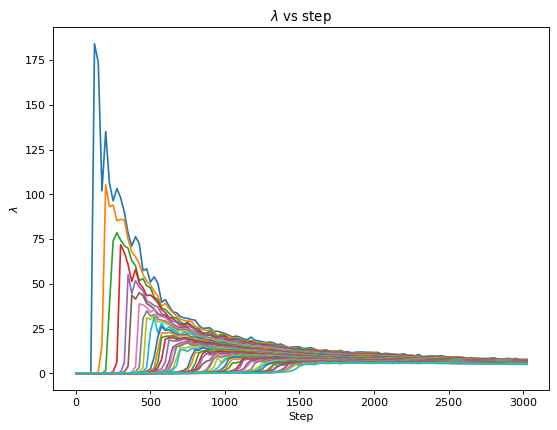

In [42]:
plot_eigen(lines)

In [33]:
with open("./checkpoint_lam1/eigen.txt") as f:
    lam1_lines = f.readlines()

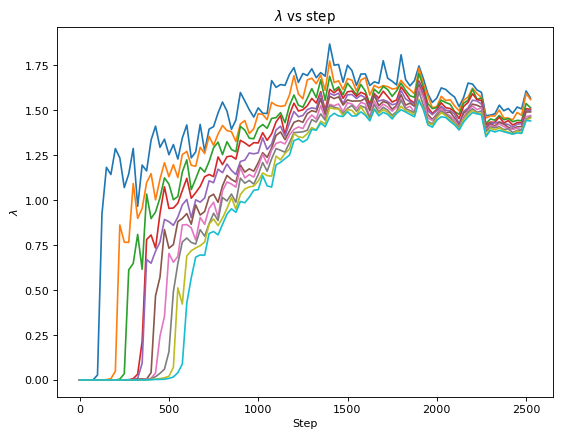

In [34]:
plot_eigen(lam1_lines)

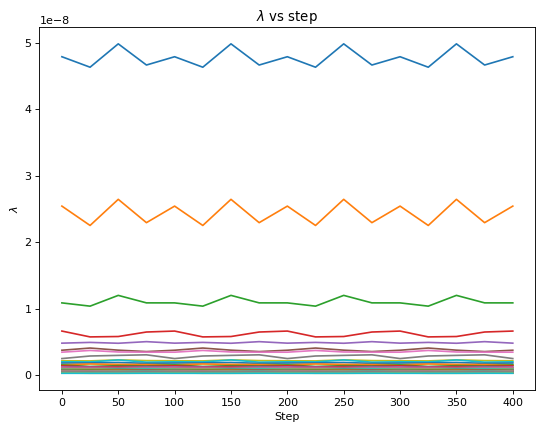

In [48]:
with open("./checkpoint_good_sqrt/eigen.txt") as f:
    good_lines = f.readlines()
plot_eigen(good_lines)

In [62]:
n = 200

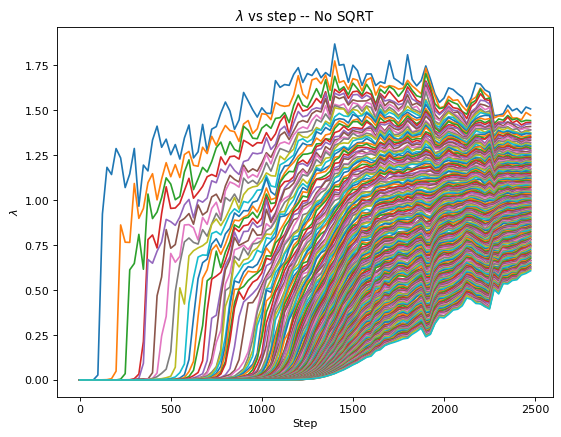

In [63]:
plot_eigen(lam1_lines, 100, "No SQRT")

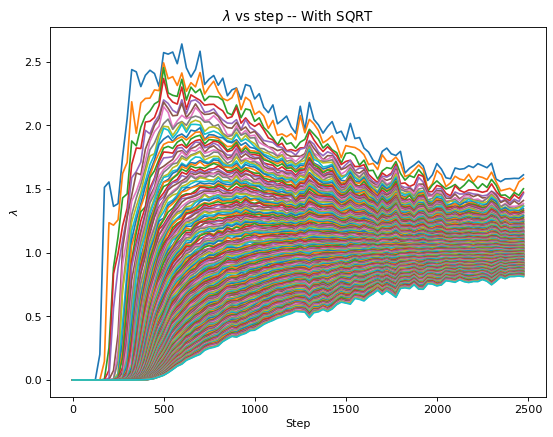

In [64]:
plot_eigen(test_lines, 100, "With SQRT")

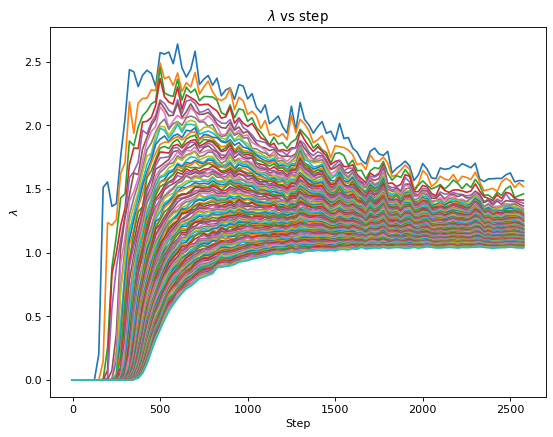

In [52]:
with open("./checkpoint_test/eigen.txt") as f:
    test_lines = f.readlines()
plot_eigen(test_lines)

In [16]:
all_eigen = list(map(lambda x : ast.literal_eval(x)['eigenvalues'][:n], test_lines))


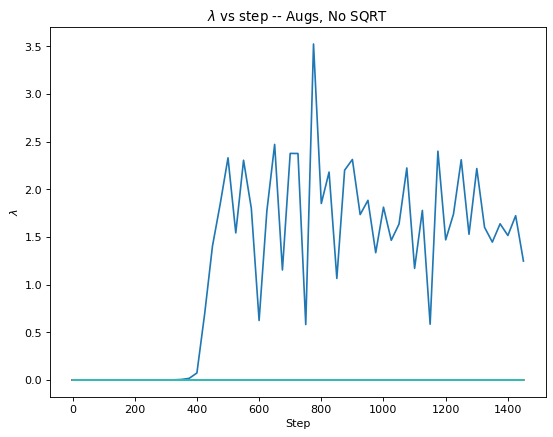

In [9]:
with open("./checkpoint_aug_no_sqrt/eigen.txt") as f:
    test_lines = f.readlines()
plot_eigen(test_lines, None, "Augs, No SQRT")

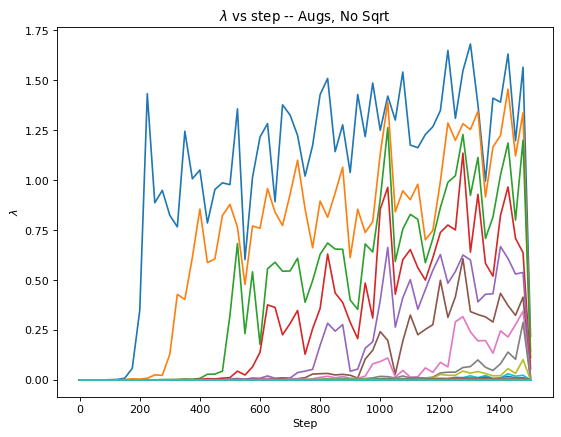

In [15]:
mk_plot("aug_no_sq_higher_init", "Augs, No Sqrt")

In [19]:
with open("checkpoint_aug_no_sq_higher_init/eigen.txt") as f:
    aug_lines = f.readlines()

In [4]:


plot_scaled_eigen(aug_lines)

NameError: name 'aug_lines' is not defined

In [61]:
n = 5

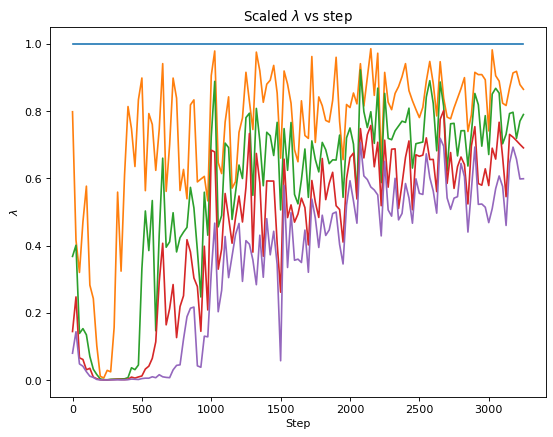

In [62]:
with open("checkpoint_aug_no_sq_higher_init/eigen.txt") as f:
    aug_lines = f.readlines()
plot_scaled_eigen(aug_lines)

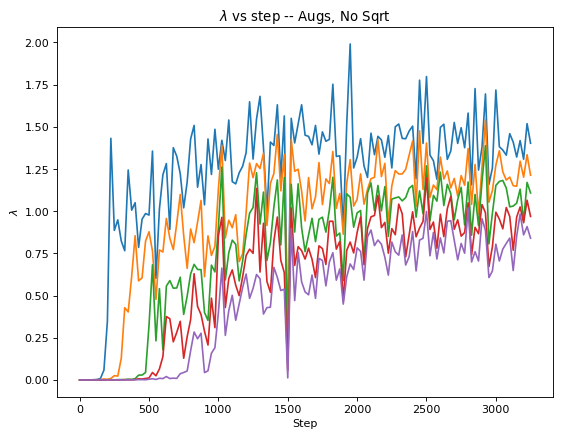

In [63]:
mk_plot("aug_no_sq_higher_init", "Augs, No Sqrt")

In [30]:
e = np.array(e_range)
plot_scaled_eigen(aug_lines)

In [37]:
e.shape

(69, 100)

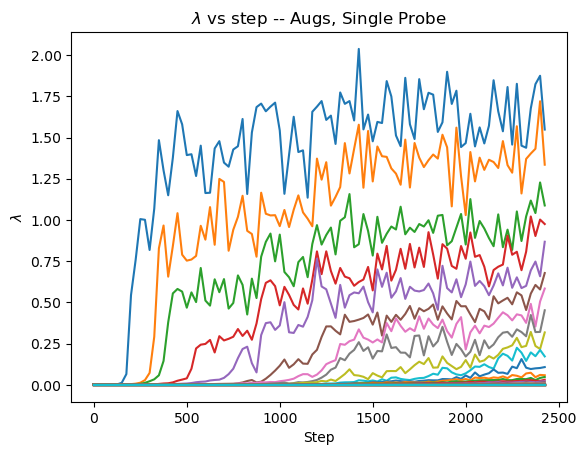

In [73]:
mk_plot("aug_no_sq_high_i_single_probe", "Augs, Single Probe")

In [27]:
with open("checkpoint_aug_no_sq_high_i_single_probe/stats.txt") as f:
    aug_stats = f.readlines()
with open("checkpoint_aug_no_sq_high_i_single_probe/eigen.txt") as f:
    aug_eigen = f.readlines()

<Figure size 1000x1000 with 0 Axes>

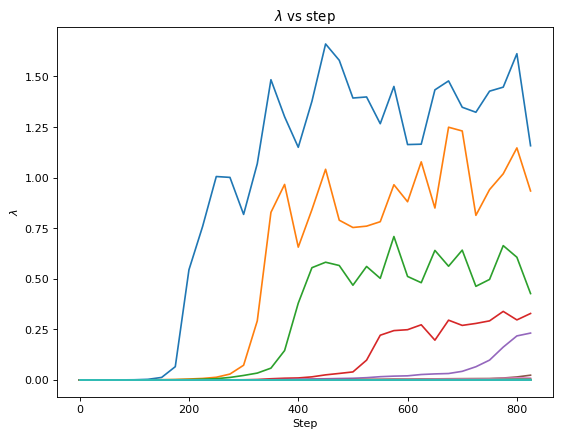

In [28]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plot_eigen(aug_eigen)

plt.subplot(2, 1, 2)

In [20]:
all_loss = list(map(lambda x : ast.literal_eval(x)['loss'], aug_stats[1:]))


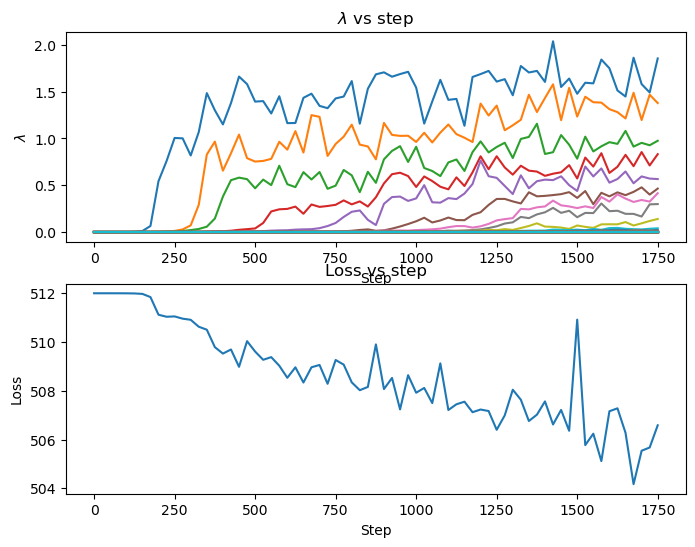

In [59]:
with open("checkpoint_aug_no_sq_high_i_single_probe/stats.txt") as f:
    aug_stats = f.readlines()
with open("checkpoint_aug_no_sq_high_i_single_probe/eigen.txt") as f:
    aug_eigen = f.readlines()

fig = plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plot_eigen(aug_eigen, fig=fig)

plt.subplot(2, 1, 2)
plot_loss(aug_stats, fig=fig)

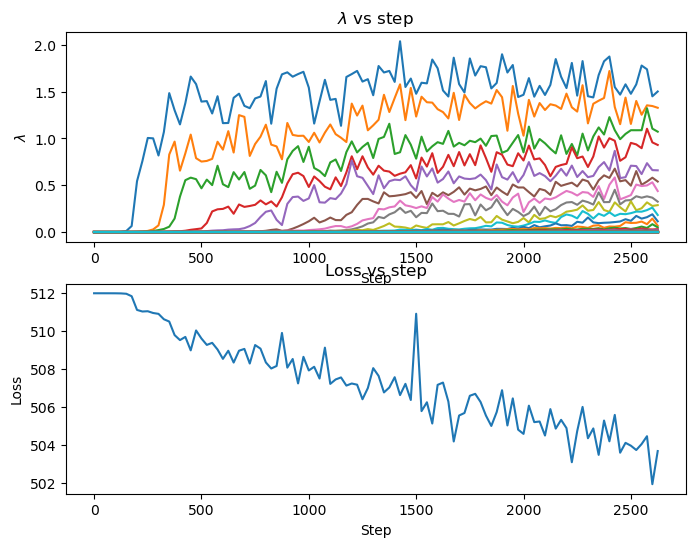

In [74]:
plot_eigen_loss("aug_no_sq_high_i_single_probe")

In [9]:
n = 10

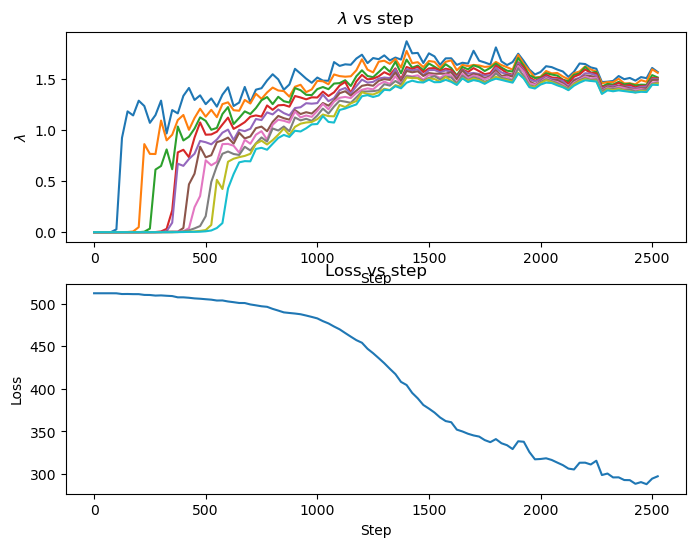

In [10]:
plot_eigen_loss("lam1")

In [11]:
n = 100

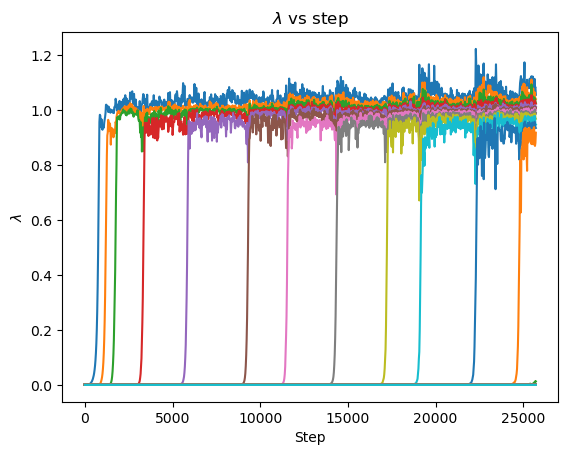

In [12]:
mk_plot("no_sqrt_no_norm")

In [17]:
n = 100

Failed for line: /opt/conda/envs/pytorch/lib/python3.9/site-packages/ipykernel_launcher.py -f /home/ubuntu/.local/share/jupyter/runtime/kernel-cf6a18a0-9ec4-4b2c-a513-69b885f72f70.json

Failed for line: /opt/conda/envs/pytorch/lib/python3.9/site-packages/ipykernel_launcher.py -f /home/ubuntu/.local/share/jupyter/runtime/kernel-cf6a18a0-9ec4-4b2c-a513-69b885f72f70.json



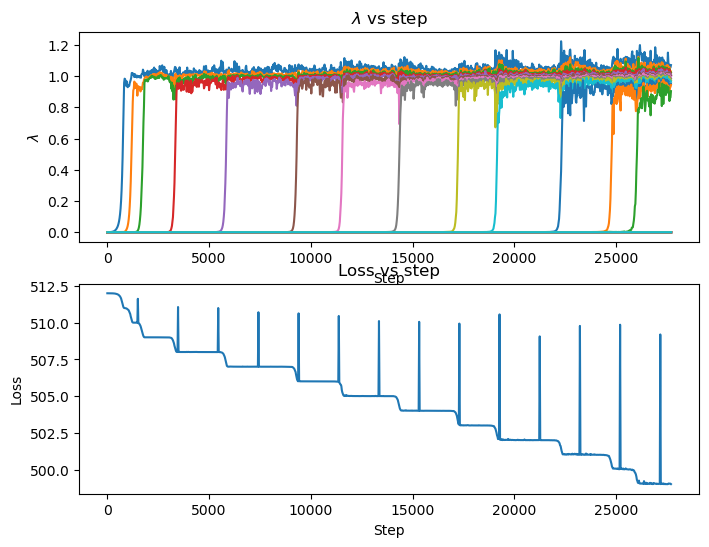

In [4]:
plot_eigen_loss("no_sqrt_no_norm")

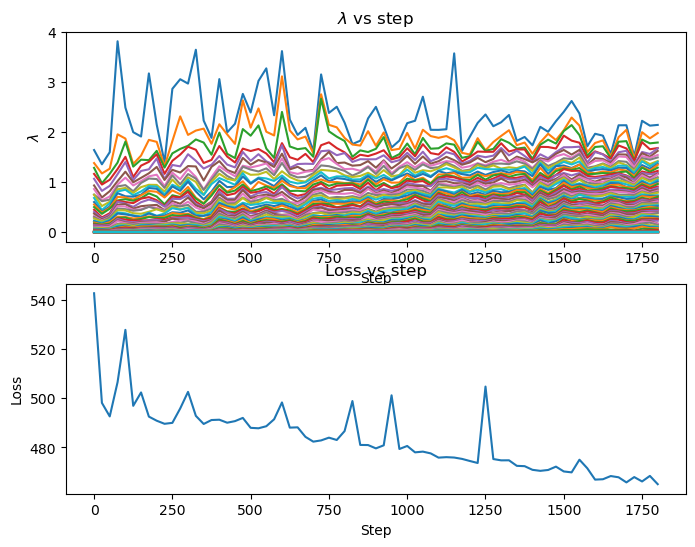

In [13]:
plot_eigen_loss("no_sqrt_no_norm_high_init", first=10)

Failed for line: /opt/conda/envs/pytorch/lib/python3.9/site-packages/ipykernel_launcher.py -f /home/ubuntu/.local/share/jupyter/runtime/kernel-48a3c280-bf59-42be-ad02-eb397354aec4.json



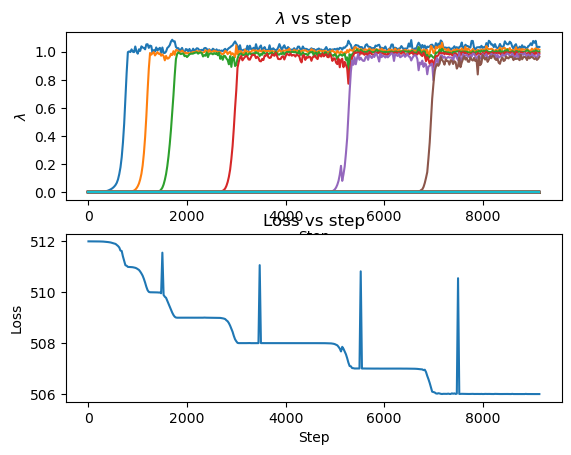

Failed for line: /opt/conda/envs/pytorch/lib/python3.9/site-packages/ipykernel_launcher.py -f /home/ubuntu/.local/share/jupyter/runtime/kernel-48a3c280-bf59-42be-ad02-eb397354aec4.json



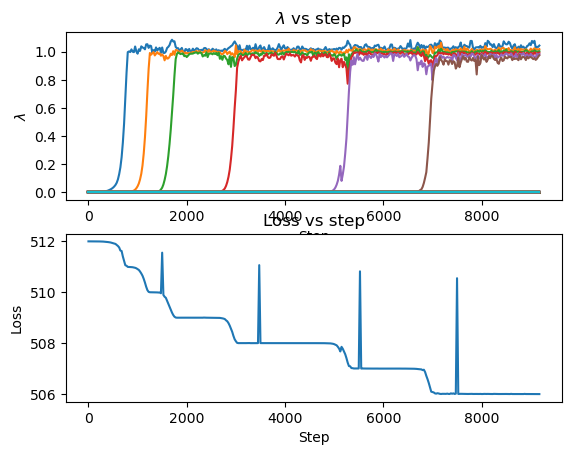

Failed for line: /opt/conda/envs/pytorch/lib/python3.9/site-packages/ipykernel_launcher.py -f /home/ubuntu/.local/share/jupyter/runtime/kernel-48a3c280-bf59-42be-ad02-eb397354aec4.json



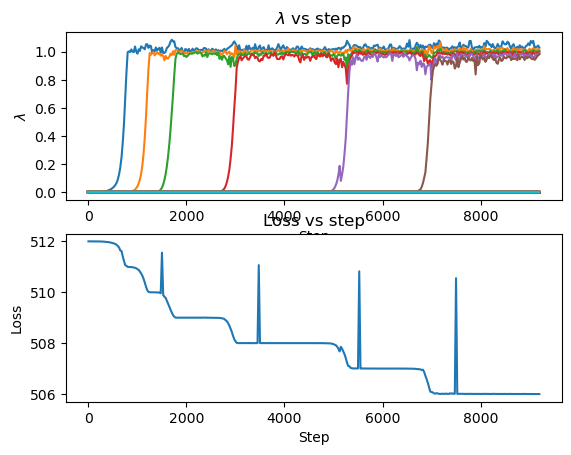

KeyboardInterrupt: 

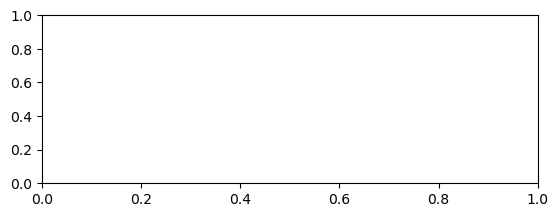

In [9]:
fig = plt.figure()
for i in range(100):
    plt.clf()
    plot_eigen_loss("no_sqrt_no_norm_take_2", fig=fig)
    plt.show()
    time.sleep(1.)

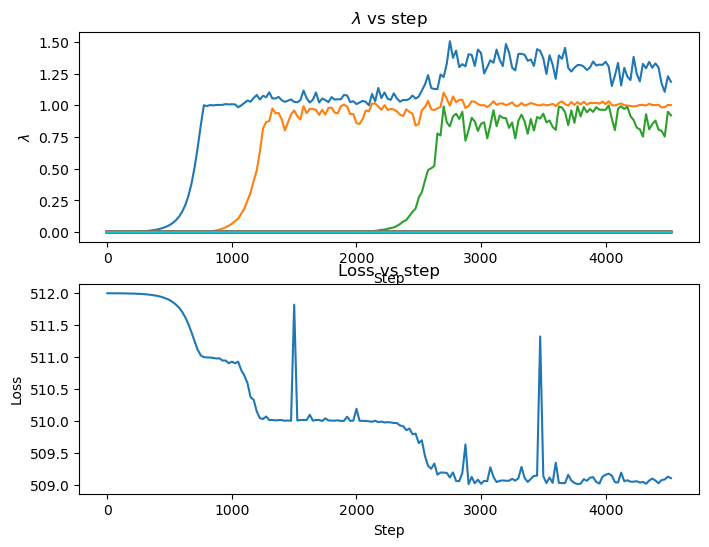

In [15]:
plot_eigen_loss("augs_no_sq_no_norm")